<a href="https://colab.research.google.com/github/rafalkow/Bike_Sharing_Demand/blob/main/Fashion_Image_Classification_using_PyTorch_Work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch
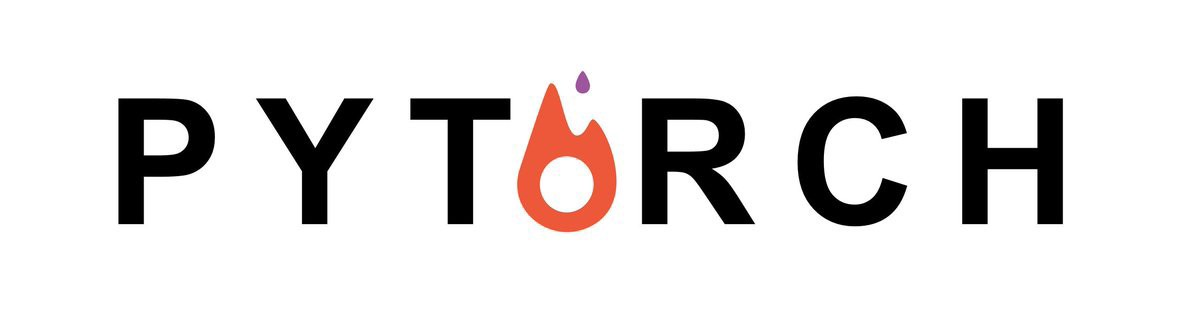

*   PyTorch is a machine learning package based on Torch.
*   Torch is a ML library based on the Lua programming language, first released in Oct-2002.
*   PyTorch is primarily and actively developed by Facebook's AI Research (FAIR) Lab.
*   Mainly used for NLP and Computer Vision applications, many programs such as Tesla's Autopilot, Uber's Pyro are built on PyTorch.

*   PyTorch package provides two high-level features:

    1.   Use Tensor computation (like Numpy) accelerated using GPU.
    2.   Deep Neural Networks built on tape-based automatic differentiation system.







## Convolutional Neural Networks


**Deep Neural Networks**: Traditional Neural Networks are string of neurons connected together.

It has the: Input layer, Hidden Layers, Output layer.

The input flows from the Input layer to the Output layer through the hidden layers.

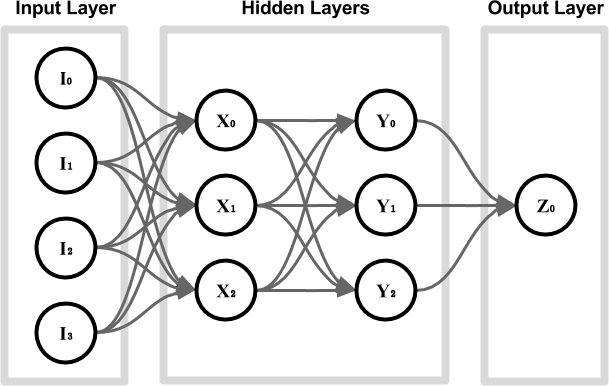

**Kernel Convolution**: A process where we take a small grid of numbers & pass them over the whole image transforming it. By using different numbers we can form blurs, edge detection, sharpen etc.,

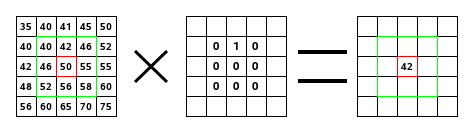

**Convolutional Neural Networks**
CNN's combine traditional Neural Networks and Convolutions.

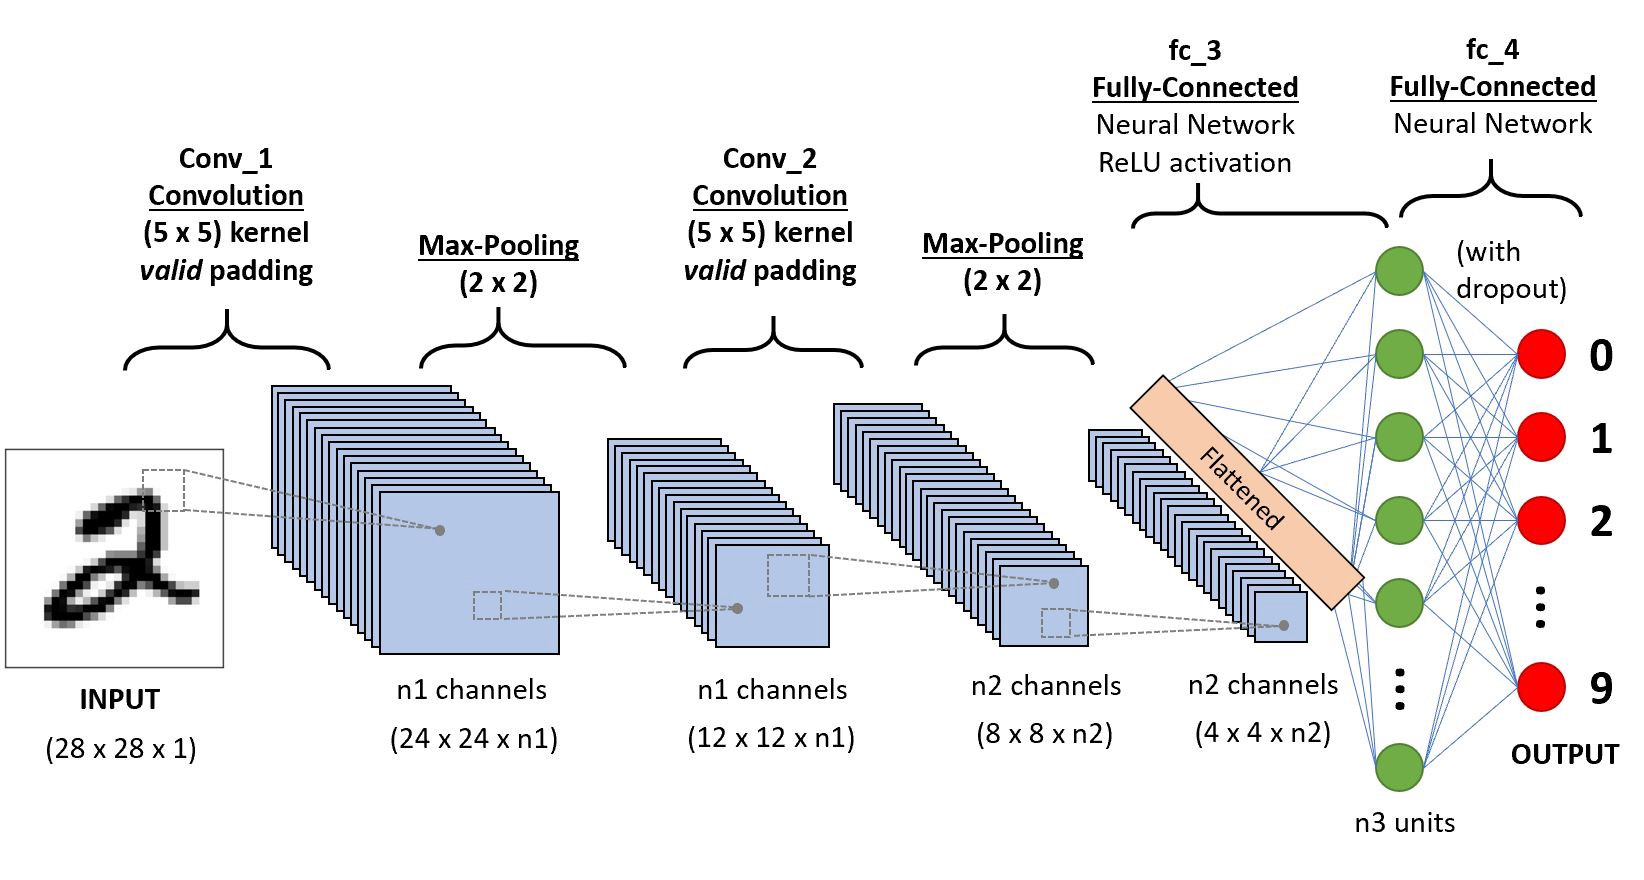




## About the Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

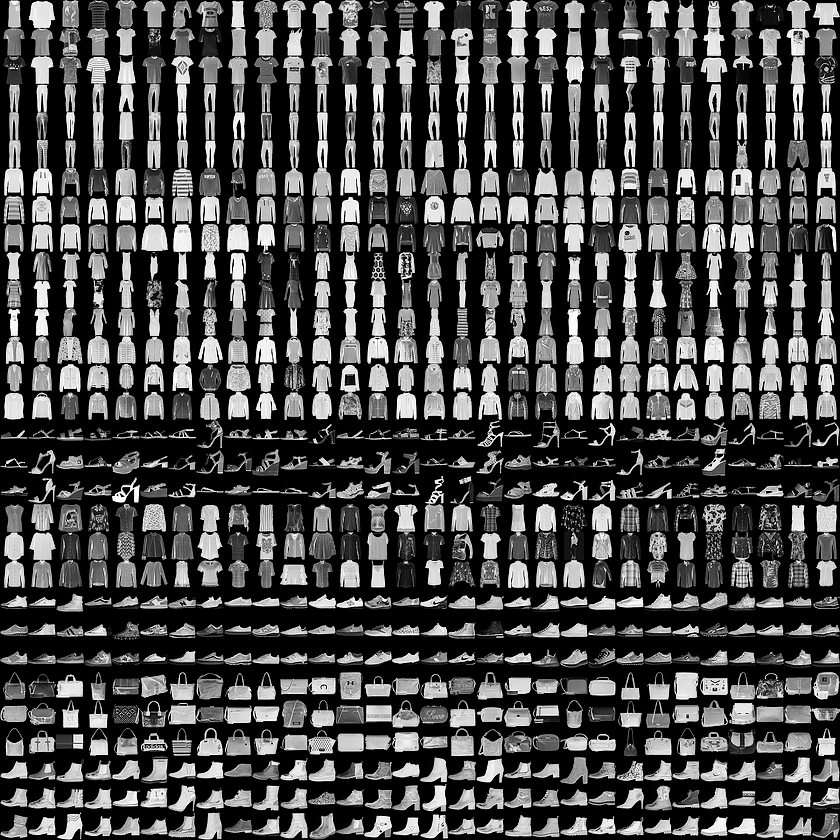

In [2]:
# importing the libraries
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets
from torchvision import transforms
from torch import nn, optim

In [4]:
# check the version of pytorch
print(torch.__version__)

2.0.1+cu118


##**Data Augmentation**

Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data.

Common Techniques

1. Image Flipping
2. Image Blur
3. Image Rotation


In [6]:
from skimage import io
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pyplot as plt

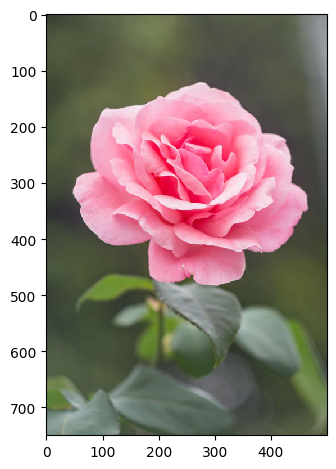

In [11]:
image = io.imread('sample_flower.jpeg')

io.imshow(image)

## **Rotating the Image by 45 Degrees**

Rotated image


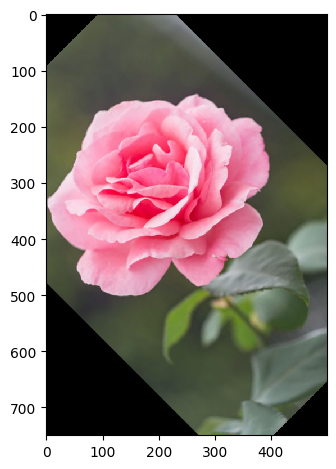

In [12]:
rotated = rotate(image, angle=45)
print('Rotated image')
io.imshow(rotated)

## **Flip Image left-to-right**

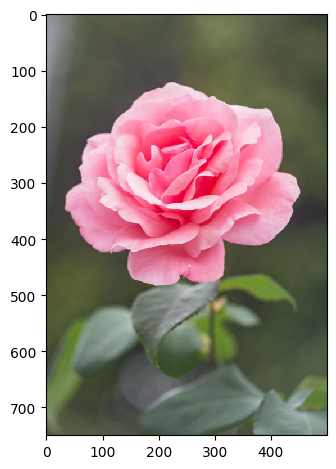

In [14]:
flipLR = np.fliplr(image)
io.imshow(flipLR);

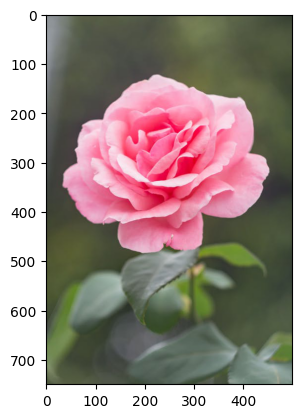

In [15]:
plt.imshow(flipLR);

## **Blur the Image**

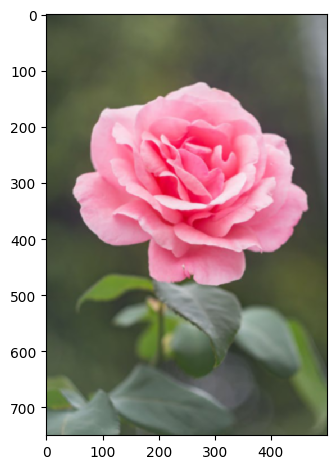

In [16]:
blured = gaussian(image, sigma=1, multichannel=True)
io.imshow(blured);

**Transforms** are common image transformations.

Transforms can be Image Resize, converting an image tensor or the augmentation techniques we have seen above.

-> All transformations accept PIL Image, Tensor Image or batch of Tensor Images as input.


**transform.Compose** clubs all the transforms provided to it. All the transforms in the transforms.Compose are applied to the input one by one.

Transforms are done on batches and randomly based on the probability provided by us for that specific transformation.

## Data Preprocessing


## **PyTorch Tensor**

Tensors are the basic data structure used by neural networks in Pytorch.

 A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing.

Also unlike numpy, PyTorch Tensors can utilize GPUs to accelerate their numeric computations. To run a PyTorch Tensor on GPU, you simply need to cast it to a new datatype.


In [23]:
import PIL

transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.RandomHorizontalFlip(p=0.5),
                                 transforms.RandomVerticalFlip(p=0.5),
                                 transforms.GaussianBlur(3, sigma=(0.1, 2.0)),
                                 transforms.RandomRotation(45) # , resample=PIL.Image.BILINEAR
                                 ])

#Defining the training and testing set


In [26]:
from matplotlib.transforms import TransformedBbox
trainset = datasets.FashionMNIST('data/',download=True,train=True, transform = transform)
testset  = datasets.FashionMNIST('data/',download=True,train=False,transform = transform)

100%|██████████| 26421880/26421880 [00:14<00:00, 1788041.77it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 57580.27it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 2159161.27it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 1457362.11it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



#Defining trainloader and testloader
The transforms operations are applied to your original images at every batch generation.

So your dataset is left unchanged, only the batch images are copied and transformed every iteration.

In [27]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader  = torch.utils.data.DataLoader(testset,  batch_size=64, shuffle=True)

In [28]:
print(len(trainset))
print(len(testset))

60000
10000


## **Visualizing the Training Images**

In [30]:
dataiter = iter(trainloader)
images,labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


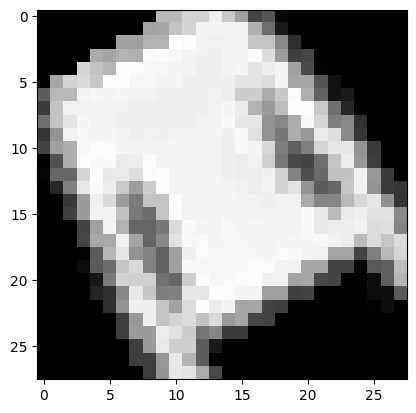

In [35]:
plt.imshow(images[44].numpy().squeeze(),cmap='gray')

## PyTorch Model


## **Conv2d**

Applies Convolutions/filters on our image and outputs the feature map.

## **Batch Normalization**

We normalize the input layer by adjusting and scaling the activations. For example, when we have features from 0 to 1 and some from 1 to 1000, we should normalize them to speed up learning. If the input layer is benefiting from it, why not do the same thing also for the values in the hidden layers, that are changing all the time, and get 10 times or more improvement in the training speed.

Batch normalization reduces the amount by what the hidden unit values shift around.

## **RELU**
The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

## **Max Pooling**

 The pooling layer serves to progressively reduce the spatial size of the representation, to reduce the number of parameters, memory footprint and amount of computation in the network, and hence to also control overfitting.






## **Forward Pass**
The **forward pass** refers to calculation process, values of the output layers from the inputs data. It's traversing through all neurons from first to last layer.

A loss function is calculated from the output values.

## **Backward Pass**

And then "backward pass" refers to process of counting changes in weights (de facto learning), using gradient descent algorithm (or similar). Computation is made from last layer, backward to the first layer.

Backward and forward pass makes together one "iteration".

During one iteration, you usually pass a subset of the data set, which is called "mini-batch"
(if you pass all data at once, it is called "batch")

**Epoch** means passing the entire data set. One epoch contains number_of_items/batch_size iterations

## **Defining our Neural Network**
In Pytorch, there are two requirements for defining the Net class of your model.

The first is writing an __init__ function that references nn.Module. This function is where you define the fully connected layers in your neural network.

Second, you just have to define the forward function, that will pass the data into the computation graph (i.e. our neural network). This will represent our feed-forward algorithm.

**Adam** is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

**Cross-entropy loss**, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.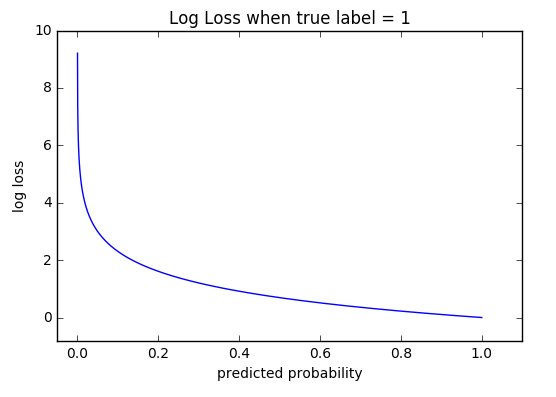

## Training

This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

## Results

Getting Predictions on test set and measuring the performance